# Unit 07 Fitting Part I

<a rel="license" href="https://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://licensebuttons.net/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

Author: Dr Antonia Mey   
Email: antonia.mey@ed.ac.uk
  
### Learning objectives
By the end of this unit, you should be able to 
* Get more practice with plotting data and computing molecular properties.
* Test how correlated two datasets are using `scipy`
* Understand how to find the minimum of a function computationally.
* Use the library `scipy` to find a line of best fit.
* Use the library `scipy` to be able to fit an exponential function.
* Know of other fitting functions, such as polynomial or Gaussian fits.   

### Table of Contents
1. [Recap](#1-recap-molecular-geometries-and-plotting)      
   1.1 [Recap: molecular geometries](#11-recap-of-molecular-geometries)              
   1.2 [Recap: mean $\mu$ and standard deviation $\sigma$](#12-recap-of-mean-and-std)      
   1.3 [Recap: plotting distributions](#13-recap-of-plotting-distributions)     
   1.4 [Tasks 1](#tasks-1)     
2. [Skewed distributions](#2-skewed-distributions)    
3. [Computing Correlations](#3-computing-correlations)    
   3.1 [Pearson's correlation coefficient](#31-pearsons-correlation-coefficient)      
   3.2 [Tasks 2](#tasks-2)   
   3.3 [Spearman's rank correlation coefficient](#33-spearmans-rank-correlation-coefficient)    


### Links to documentation

You can find the full documentation to `scipy` at [scipy.org](https://scipy.org).

**<span style="color:black">Jupyter Cheat Sheet</span>**
- To run the currently highlighted cell and move focus to the next cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- To run the currently highlighted cell and keep focus in the same cell, hold <kbd>&#x21E7; Ctrl</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- To get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>;

# Import libraries

In [1]:
import sys
import os.path
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import math as m

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    # copy over data repository
    !git clone https://github.com/Edinburgh-Chemistry-Teaching/Data-driven-chemistry
    !cp -r Data-driven-chemistry/Unit_07/data .
    sys.path.append(os.path.abspath('Data-driven-chemistry/'))
else:
    sys.path.append(os.path.abspath('../'))
from helper_functions.mentimeter import Mentimeter

# 1. Recap <a id='1-recap-molecular-geometries-and-plotting'></a>

## 1.1 molecular geometries <a id='11-recap-of-molecular-geometries'></a>

### Bonds
To compute the length of a bond **a**, we need to know the length of the vector connecting two atoms A and B using this formula:

$\vert\vert \mathbf{a}\vert \vert$=$\sqrt{(x_B-x_A)^2+(y_B-y_A)^2+(z_B-z_A)^2}$

In Python, `np.linalg.norm(B-A)` is a fast way of computing the distance between two vectors if the input is the form of a NumPy array.

In [ ]:
# Example positions of a water molecule

position_atom_H1 = np.array([0.758602, 0.000000,  0.504284])
position_atom_O  = np.array([0.000000, 0.000000,  0.000000])
position_atom_H2 = np.array([0.260455, 0.000000, -0.872893])

In [ ]:
def compute_bond_length(atom1, atom2):
    """ This function computes the bond length between two atoms
    
    Parameters:
    -----------
    atom1:numpy array 
        contains 3 entries as x, y and z coordinates
    atom2:numpy array
        contains 3 entries as x, y and z coordinates
    
    Returns:
    --------
    bond_length :float
        value of the bond length
    """
    
    bond_length = np.linalg.norm(atom1-atom2)
    return bond_length

In [ ]:
bond_length = compute_bond_length(position_atom_H1, position_atom_O)
print(f'The H-O bond length is: {bond_length:.2f} Å.')

### Angles

Here is an example of an angle in a water molecule, where vector *H1*, *O*, and *H2*  give the positions of the atoms in space.

![indexing](images/bond_angles.png)

The bond length between H1 and O is given by the vector connecting these two atoms **a** in the image and can be computed using the above formula. 


To determine the angle between two vectors you can use the scalar product: 

$$\mathbf{a}\cdot \mathbf{b} = \vert\vert\mathbf{a}\vert\vert \,\vert\vert\mathbf{b}\vert\vert\cos \phi,$$

where $\mathbf{a}$ and $\mathbf{b}$ are vectors, and  $\phi$ is the valence angle we are after. We need to solve the dot product according to the valence angle $\phi$ by rearranging the above equation:

$$\phi = \arccos\Big(\frac{\mathbf{a}\cdot\mathbf{b}}{\vert\vert\mathbf{a}\vert\vert \,\vert\vert\mathbf{b} \vert\vert}\Big)$$

You can use the `math` library to get the arccos of an angle, e.g.: `math.acos()`

The scalar product or dot product can be computed using `np.dot()` in Python.

In [ ]:
def compute_angle_water(O_position, H1_position, H2_position):
    """This function computes the angle between two three atoms
    
    Parameters:
    -----------
    H1_position:numpy array 
        contains 3 entries as x, y and z coordinates
    O_position:numpy array
        contains 3 entries as x, y and z coordinates
    H2_position:numpy array
        contains 3 entries as x, y and z coordinates
    
    Returns:
    --------
    angle :float
        value of the angle
    """
    vector_of_bond_a = H1_position-O_position
    vector_of_bond_b = H2_position-O_position

    bond_length_a = compute_bond_length(H1_position, O_position)
    bond_length_b = compute_bond_length(O_position, H2_position)
    
    angle = m.acos(np.dot(vector_of_bond_a,vector_of_bond_b)/(bond_length_a*bond_length_b))
    return np.degrees(angle)
    

In [ ]:
angle = compute_angle_water(position_atom_O,position_atom_H1,position_atom_H2)
print(f'The angle of a water molecule is: {angle:.2f}°.')

## 1.2 Recap: mean $\mu$ and standard deviation $\sigma$  <a id='12-recap-of-mean-and-std'></a>

The **mean** $\mu$ is given by:

\begin{equation}
\mu = \frac{1}{N} \sum_i^N x_i ,
\end{equation}

where $N$ is a number of samples, as as they increase the mean becomes closer to the 'true' value. 


```python
mu = np.sum(x) / len(x)
```

or with numpy: `np.mean(x)`.

_Note:_ **Median** is a middle value separating the greater and lesser halves of a data set, since the normal distribution is symmetric, mean and median are equivalent. 



The **standard deviation** (STD), $\sigma$ quantifies how much the numbers in our set deviate from the mean, $\mu$

\begin{equation}
\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N(x_i-\mu)^2}.
\end{equation}

it can be written as:

```python
sigma = np.sqrt( np.sum( ( x - np.mean(x))**2 ) / len(x) )
```

or with numpy `np.std(x)`.



On a **normal distribution** the values that are less than 1 $\sigma$ away from the mean, $\mu$, will account for the 68.27% of the set - this is our **confidence interval**

<img src="images/NormalDist.png" width="500">



## 1.3 Recap: plotting distributions <a id="13-recap-of-plotting-distributions"></a>

Take a look at the following code:

```python

# Generate 10000 random samples from a normal distriubution 
X = np.random.normal(4, 0.3, 10000)
# initiate the plot
fig, ax = plt.subplots()
fig.set_figwidth(4)
fig.set_figheight(4)
# Use numpy to compute a histogram
prob, edges = np.histogram(X, density = True, bins=30)
half_width = (edges[1]-edges[0])/2
bin_centres = edges[:-1]+half_width
# plot the probability density from the histogram
ax.plot(bin_centres, prob, marker="o", color="red")

```

How would you expect the final plot to look like?

## 1.4. Tasks 1<a id="tasks-1"></a>

<div class="alert alert-success">
    <b>Task 1.1 </b> : generate a 1D array, x, and plot x squared using non-default line types and colours, label the plot
</div>

<div class="alert alert-info">
    <b>Hint 1</b> : Information on how to cutomise the your plots (e.g., setting line styles, labels, titles) can be found in the <a href="..\Unit_05\Extra_Plotting.ipynb">extra material of Unit 05</a>.
</div>



<div class="alert alert-info">
    <b>Hint 2</b> : To neatly write sub- and superscripts on the plots, like  $x_2$  or $x^2$ in the example above, use the $LaTeX$ notation in the code - <code>$x_2$</code> and <code>$x^2$</code> respectively. For  <a href="https://matplotlib.org/3.1.1/tutorials/text/mathtext.html">more examples see here</a>.
</div>

In [ ]:
# Task 1.1: Test out the solution in this cell:
# FIXME


<details><summary {style='color:green;font-weight:bold'}> Click here to see the solution to Task 1.1 </summary>
    
```python

# generating an array
x = np.linspace(-10, 10, 21) 
y = x**2

# plotting with x in a named colour, connected by a dotted line of a declared width
plt.plot(x, y, "x:", color="tomato", linewidth="1.5") 

# adding labeLs
plt.xlabel("x")
plt.ylabel("y")
plt.title("my plot $y=x^2$")

plt.show()

```

</details>

<div class="alert alert-success">
    <b>Task 1.2 </b> : The file <code>data/water.xyz</code> contains a cluster of ice, i.e. many water molecules in a solid state. It has the <code>xyz</code> -file format and below is some help given how to read data from the file. 


1. Take a look at how the file is read and make sure you understand it. This is one example way of reading this file. There are many other options too.   
2. Compute the angle of each water molecule using the function defined above and append each angle to a list of angles.      
3. Plot a distribution of from the list of angles and report its mean and standard deviation.     
</div>

In [ ]:
# Have a look at the data file first 
!head data/water.xyz

In [ ]:
# reading the data in
# This generates a numpy array with the coordinates
data = np.genfromtxt('data/water.xyz', skip_header=1, usecols=[1,2,3])
# We don't want to use the first row and the first column this is what skup_header and use_cols does

# now we loop over this in threes to group the molecules together:
water_molecules = []
for i in range(0,len(data),3):
    # This selects each water molecule
    water_molecule = data[i:i+3]
    # Uncomment this line to see what is happening in detail
    # print(water_molecule)
    water_molecules.append(water_molecule)
print(f'We have {len(water_molecules)} water molecules in our file.')

In [ ]:
# FIXME


<details><summary {style='color:green;font-weight:bold'}> Click here to see the solution to Task 1.2 </summary>
    
```python

# subtask 2
# computing angle
angles = []
for water in water_molecules:
    angle = compute_angle_water(water[0], water[1], water[2])
    angles.append(angle)
    
# subtask 3
# plotting the distribution
plt.hist(angles, bins=30)
plt.xlabel("angle in degree")
plt.ylabel("Count")

print(f"The mean is {np.mean(angles):.2f}")
print(f"The standard deviation is {np.std(angles):.2f}")

```

</details>

Data is said to be **perfectly correlated**, if all points fall onto a straight line that is $x=y$. Take a look at your data: which of the four plots do you think is the most correlated?

<div class="alert alert-warning">
    <b>Task 1.3 (advanced) </b> : Working with data. Use the file <code>data/ramachandran.dat</code>. It contains dihedral angles of the backbone of a protein in two columns. Column 1 is the φ angle and column 2 the ψ angle. To find out more about Ramachandran diagrams take a look <a href="https://en.wikipedia.org/wiki/Ramachandran_plot">here</a>, and for more on dihedral angles see <a href="https://en.wikipedia.org/wiki/Dihedral_angle">here</a>. 
<p>1. Read the data into a pandas dataframe,  </p>  
<p>2. Create a single plot that is a 2D density map of φ against ψ,  </p>
<p>3. Make sure your plot is labelled correctly and displays a colour bar!   </p>   
</div>

In [ ]:
# Task 1.3: Test out the solution in this cell:

# 1. Read the data into a pandas dataframe, 
# FIXME
  
# 2. Create a single plot that is a 2D density map of $\phi$ against $\psi$
# FIXME

# 3. Make sure your plot is labelled correctly and displays a colour bar!   
# FIXME

<details><summary {style="color:green; font-weight:bold"}> Click here to see the solution to Task 1.3 (Advanced)</summary>

```python

# Read in the dataframe
df = pd.read_csv("data/ramachandran.dat", 
                 skiprows=29, 
                 names=["phi", "psi"], 
                 usecols=[0,1], 
                 sep="\s+",
                 dtype=float)

# Check that we read it correctly
print(df.head())

# Get the columns
phi = df["phi"].to_numpy()
psi = df["psi"].to_numpy()

# Initialise figure object
fig, ax = plt.subplots(1,1)

# Plot a density plot as a 2D histogram
histogram, x_edges, y_edges, image = ax.hist2d(phi, psi, bins=(200, 200), cmap="RdYlGn_r", cmin=1)

# Add a colour bar
cbar = fig.colorbar(image, orientation="vertical")
cbar.set_label("Count")

# Add labels
ax.set_title("Ramachandran plot")
ax.set_xlabel("$\phi$")
ax.set_ylabel("$\psi$")

# Show plot
plt.show()


```

# 2. Skewed distributions <a id='2-skewed-distributions'></a>

Previously we have discussed the Gaussian distribution. This distribution is nicely symmetrical around its mean value. Often, in chemistry, we are faced with data that does not conform with this distribution. Examples of situations where this can occur include:
1. *radiactive decay* (measurement of lifetime of an unstable atom before it decays)
2. *bond length* (covalent bonds have a length fluctuating around an equilibrium value)
3. *ideal gas atoms velocity* (the temperature of a system is determined by the distribution of velocities of its costituent atoms)

## 2.1 Radioactive decay

Radioactive decay can be modelled with a statistical distribution called the *Poisson distribution*. This describes the probability of discrete event to happen at a certain moment in time, if the probability of such an event is independent from any previous observation. The distribution is defined as follows:

\begin{equation}
f(k) = \frac{\lambda^k e^{-\lambda}}{k!}
\end{equation}

Where $\lambda$ is the expected value, and $k$ the number of occurrences (an integer number).

Numpy provides us means of generating random data according to a Poisson distribution. Let's generate 10000 datapoints with an expected value of 4, and plot a histogram of the result.

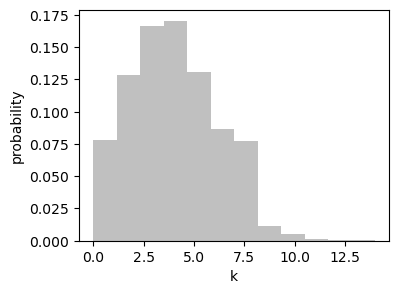

In [311]:
data = np.random.poisson(4, 10000)
fig = plt.figure(figsize=(4, 3))
count, bins, ignored = plt.hist(y, bins=12, density = True, color="silver")
plt.xlabel("k")
plt.ylabel("probability");

We notice that the distribution seems *skewed* to the right. The *skew* of a dataset, usually denoted as $\mu_3$ (the "3" annotation comes from the formal definition of skew as the "third moment of the distribution") can be quantified as follows:

\begin{equation}
\mu_3 = \frac{1}{N} \sum_i^N \left( \frac{x_i - \mu}{\sigma} \right)^3
\end{equation}

<div class="alert alert-success">
    <b>Task 2.1.1 </b> : Calculate the skew of the data generate according to the Poisson distribution. How does that compare with that of a Gaussian?
</div>

<details><summary {style='color:green;font-weight:bold'}> Click here to see the solution to Task 2.1.1 </summary> 

```python
skew = np.mean(((data-np.mean(data))/np.std(data))**3)
print(skew)

data2 = np.random.normal(size=10000)
skew2 = np.mean(((data2-np.mean(data2))/np.std(data2))**3)
print(skew2)
```
</details>

## 2.3. Bond lengths

Bonds vibrate around an equilibrium distance, however the distribution is not symmetrical around the mean value. Let's simulate some data to showcase this.

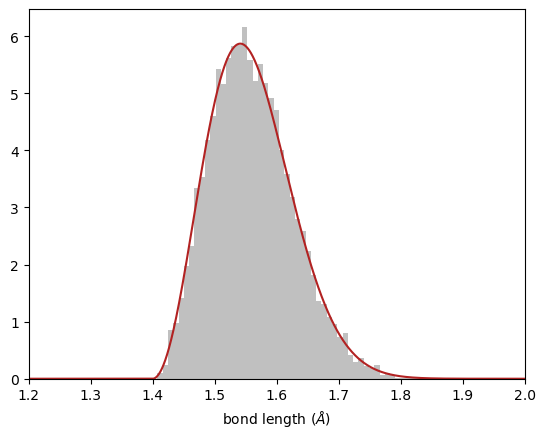

In [279]:
from scipy.stats import maxwell

scale = 0.1
loc = 1.4

#get distribution
x = np.linspace(0, 3, 5000)
distr = maxwell.pdf(x, scale=scale, loc=loc)

# generate random samples from the distribution
data = maxwell.rvs(loc=loc, scale=scale, size=10000)
count, bins, ignored = plt.hist(data, bins=50, density=True, color="silver")

plt.plot(x, distr, color="firebrick")
plt.xlabel("bond length ($\AA$)")
plt.xlim([1.2, 2]);

<div class="alert alert-success">
    <b>Task 2.2.2 </b> : Calculate the mode, median, mean, and skew of the bond length data we just generated, and stored in the variable <code>data</code>. Which do you think is a better metric to describe the distribution?
</div>

<details><summary {style='color:green;font-weight:bold'}> Click here to see the solution to Task 2.2.2 </summary> 

```python
mean = np.mean(data)
mode = np.max(data)
median = np.percentile(data, 50)
skew = np.mean(((data-np.mean(data))/np.std(data))**3)
print(mean, mode, skew)
```
</details>

## 2.3. Atoms velocities in an ideal gas

A distribution relevant for chemistry and physics is the Maxwell-Boltzmann distribution, which was derived to describe the velocity of ideal gas atoms at a given temperature. This is defined as:

\begin{equation}
f(v) = \frac{4}{\sqrt{\pi}} \left( \frac{m}{2 k_B T} \right)^{3/2} v^2 e^{(- mv^2 / 2 k_B T)}
\end{equation}

Where $v$ is the velocity of the atom, $m$ its mass, $T$ the temperature, and $k_B$ the Boltzmann constant. Let's define a function generating this distribution.

In [264]:
def maxwell_boltzmann(v, T, m):
    """This function returns the probability of observing a specific atomic velocity
    according to the Maxwell-Boltzmann distribution at a given temperature
    
    Parameters:
    -----------
    v: float 
        velocity in m/s
    T: float
        temperature in Kelvin
    m: float
        atomic mass in kg
    
    Returns:
    --------
    probability :float
        probability of observing a given velocity
    """

    kb = 1.380649*(10**(-23)) # Boltzmann constant
    scale = (4/np.sqrt(np.pi))*(m/(2*kb*T))**(3./2) #scaling factor (ensure integral of whole distribution equals 1)
    
    return scale*(v**2)*np.exp(-(m*(v**2))/(2*kb*T))

Let's now call our function to predict the distribution of atomic velocities in our ideal gas at a certain temperature.

In [265]:
# define mass of atom of interest, in kg
atomic_mass = 4 # Helium 4, Nitrogen 20, Argon 40, ...
mass = atomic_mass*1.660540199*(10**(-27)) # in kg

#define temperature in Kelvin
temperature = 300

#get probability of a specific velocity being observed (in m/s)
vel = np.linspace(0, 5000, 1000) # range of velocities
prob = maxwell_boltzmann(vel, temperature, mass) # probability of each velocity

Now let's calculate two quantities: the mean value, and the position of the highest value, also called the *mode*.

In [266]:
# find mean velocity and its probability
vel_mean = np.max(vel)*np.mean(prob*vel)
prob_mean = maxwell_boltzmann(vel_mean, temperature, mass)
print(f"mean velocity: {vel_mean:4.0f} m/s")

# find mode (i.e., highest probability)
vel_mode_pos = np.argmax(prob)
vel_mode = vel[vel_mode_pos]
prob_mode = maxwell_boltzmann(vel_mode, temperature, mass)
print(f"maximal velocity: {vel_mode:4.0f} m/s")

mean velocity: 1259 m/s
maximal velocity: 1116 m/s


Looks like the mean and mode do not match. We have a skew, let's have a better look at the distribution.

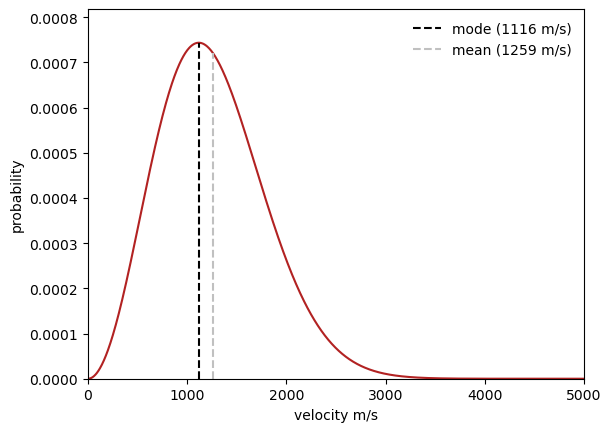

In [267]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(vel, prob, color="firebrick")
ax.plot([vel_max, vel_max], [0, prob_max], linestyle="--", color="black", label=f"mode ({vel_mode:4.0f} m/s)")
ax.plot([vel_mean, vel_mean], [0, prob_mean], linestyle="--", color="silver", label=f"mean ({vel_mean:4.0f} m/s)")
ax.set_xlim([0, vel[-1]])
ax.set_ylim([0, np.max(prob)*1.1])
ax.set_xlabel("velocity m/s")
ax.set_ylabel("probability")
ax.legend(frameon=False);

<div class="alert alert-success">
    <b>Task 2.3.1 </b> : What happens to the skew if you alter the temperature? And how about changing the gas with one of higher mass?
</div>

# 3. Computing Correlations
<a id='3-computing-correlations'></a>


<div class="alert alert-success">
    <b>Task 3.1 </b> : Working with data. Use the file <code>data/anscombes_quartet.dat</code>. This file is a tab delimiter file with 8 columns. The first and second columns make up one data set, the second and third the next one, and so forth.


1. Read the data into a pandas dataframe,    
2. Create four subplots of the data,       
3. Answer the Mentimeter question.      
</div>

In [ ]:
# Task 3.1: Test out the solution in this cell:

# An example of naming the columns of the file
colnames=["X1", "Y1", "X2", "Y2", "X3", "Y3", "X4", "Y4"]

data = pd.read_csv(# FIXME
                   skiprows=2, names=colnames)

# Setup your 4 subplots
fig, axs = plt.subplots(2, 2)

# Set the figure size
fig.set_figwidth(8)
fig.set_figheight(8)

# add data to plot
axs[0, 0].scatter(data['X1'], data['Y1'])
# FIXME
# FIXME

# make sure it is labelled
for ax in axs.flat:
    ax.set(xlabel='x-data', ylabel='y-data')
    
for ax in axs.flat:
    ax.label_outer()

# Set the ranges of all axes
plt.setp(ax, xlim=(4,20), ylim=(3,13))

<details><summary {style='color:green;font-weight:bold'}> Click here to see the solution to Task 3.1 </summary>
    
```python

# Loading the dataset
colnames=["X1", "Y1", "X2", "Y2", "X3", "Y3", "X4", "Y4"]
data = pd.read_csv("data/anscombes_quartet.dat", delimiter="\t", skiprows=2, names=colnames)

# Setup your 4 subplots
fig, axs = plt.subplots(2, 2)
fig.set_figwidth(8)
fig.set_figheight(8)

# add data to plot
axs[0, 0].scatter(data["X1"], data["Y1"])
axs[0, 1].scatter(data["X2"], data["Y2"])
axs[1, 0].scatter(data["X3"], data["Y3"])
axs[1, 1].scatter(data["X4"], data["Y4"])

# make sure it is lablled
for ax in axs.flat:
    ax.set(xlabel="x-data", ylabel="y-data")
    
for ax in axs.flat:
    ax.label_outer()

# Setting the values for all axes.
plt.setp(ax, xlim=(4,20), ylim=(3,13))

```

</details>

## 3.1 Pearson's correlation coefficient
<a id='31-pearsons-correlation-coefficient'></a>

One way of quantifying the correlation between two datasets is to compute their **Pearson's correlation coefficient $R$**. 
- If $R$ it is 1, or close to 1 the data is highly correlated, 
- around 0 the data is not correlated  
- when it is close to -1 the data is anticorrelated.

Mathematically the correlation coefficient is defined as:

$R = \frac{\langle(X-\mu_X)(Y-\mu_Y)\rangle}{\sigma_X\sigma_Y}$,

where $\sigma$ is the standard deviation of the data set $X$ or $Y$ and the symbol $\langle \cdot \rangle$ denotes computing the mean of the quantities inside the angular bracket.

The equation contains exactly what you learned last week!

Can you think of examples of correlated data?

## 3.2. Tasks 2 <a id="tasks-2"></a>

<div class="alert alert-success">
    <b>Task 3.2 </b> : Write a function that computes the Pearson correlation coefficient between two datasets, making use of the numpy functions <code>np.mean()</code> and <code>np.std()</code> to compute the mean and standard deviation.
</div>

In [ ]:
# Here is some data
number_generator = np.random.default_rng(12345)
X = 20 * number_generator.standard_normal(size=1000) + 100
Y = X + (10 * number_generator.standard_normal(1000) + 50)

In [ ]:
# Task 3.2: Test out the solution in this cell:
def compute_pearson_r(X, Y):
    r''' function that computes the Pearson correlation coefficient
    Parameters
    ----------
    Computes the correlation between X and Y
    
    X : 1-d numpy array
        dataset 1
    Y : 1-d numpy array
        dataset 2
        
    Returns:
    --------
    R : float
        value of pearson R
    '''
    
    R = None
    
    # FIXME
    
    return R

<details><summary {style='color:green;font-weight:bold'}> Click here to see the solution to Task 3.2. </summary>
    
```python


def compute_pearson_r(X,Y):
    r''' function that computes the Pearson correlation coefficient
    Parameters
    ----------
    Computes the correlation between X and Y
    
    X : 1-d numpy array
        dataset 1
    Y : 1-d numpy array
        dataset 2
        
    Returns:
    --------
    R : float
        value of pearson R
    '''
    
    R = None
    mean_x = np.mean(X)
    mean_y = np.mean(Y)
    std_x = np.std(X)
    std_y = np.std(Y)
    covariance = np.mean((X-mean_x)*(Y-mean_y))
    R = covariance/(std_x*std_y)
    
    return R

```

</details>

<div class="alert alert-success">
    <b>Task 3.3 </b> : Does your function work correctly? Check if you get the same answers as from the built-in function <code>pearsonr</code> in the <code>scipy.stats</code> package. 
</div>

In [ ]:
from scipy.stats import pearsonr
# you use pearson r from the scipy.stats package in the following way:
# pearsonr(dataset1, dataset2)[0]

# Check what happens when you remove the [0] at the end and print the output. 

In [ ]:
# Task 3.3: Test out the solution in this cell:
# FIXME


<details><summary {style='color:green;font-weight:bold'}> Click here to see the solution to Task 3.3 </summary>
    
```python

pearson1 = pearsonr(X, Y)[0]
pearson2 = compute_pearson_r(X, Y)
print(pearson1, pearson2)

```

</details>

<div class="alert alert-success">
    <b>Task 3.4 </b> : Compute the correlation coefficient of all 4 datasets of the Anscombe's quartet. What do you observe?
</div>

In [2]:
# Task 3.4: Test out the solution in this cell:
# FIXME

<details><summary {style='color:green;font-weight:bold'}> Click here to see the solution to Task 3.4. </summary>

```python
pearson1 = pearsonr(data["X1"], data["Y1"])[0]
pearson2 = pearsonr(data["X2"], data["Y2"])[0]
pearson3 = pearsonr(data["X3"], data["Y3"])[0]
pearson4 = pearsonr(data["X4"], data["Y4"])[0]
print(f"{pearson1}\n{pearson2}\n{pearson3}\n{pearson4}")
```

</details>

## 3.3. Spearman's Rank Correlation Coefficient
<a id='33-spearmans-rank-correlation-coefficient'></a>
There are other ways of measuring correlation. Take a look at the documentation of the Spearman rank correlation coefficient in the scipy package [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) and a bit more background on it [here](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient). 

<div class="alert alert-warning">
    <b>Advanced Task 3.5  </b> : Compute the Spearman's rank correlation coefficient for the Anscombe's quartet.
</div>

In [3]:
# Task 3.5: Test out the solution in this cell:
# FIXME

<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>

```Python
from scipy.stats import spearmanr
    
spearman1 = spearmanr(data["X1"], data["Y1"])[0]
spearman2 = spearmanr(data["X2"], data["Y2"])[0]
spearman3 = spearmanr(data["X3"], data["Y3"])[0]
spearman4 = spearmanr(data["X4"], data["Y4"])[0]
print(f"{spearman1}\n{spearman2}\n{spearman3}\n{spearman4}")
```



# Break
<img src="images/break.png" alt="drawing" width="200"/>

# Next notebook

[Unit 07 Fitting II](Unit_07_fitting_II.ipynb) 